<a href="https://colab.research.google.com/github/maruwrks/Deep-Learning-Task/blob/main/15_Chapter_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

##Data Prep

In [40]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [41]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

##Model Baseline

In [42]:
mse = keras.losses.MeanSquaredError()
y_pred_naive = X_valid[:, -1]
naive_mse = mse(y_valid, y_pred_naive)
print(f"MSE Prediksi Naif: {naive_mse:.4f}")

MSE Prediksi Naif: 0.0210


In [43]:
callbacks = [keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]

##Building Models

###Linear

In [44]:
model_linear = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])
model_linear.compile(loss="mse", optimizer="adam")
model_linear.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),callbacks=callbacks, verbose=1)
linear_mse = model_linear.evaluate(X_valid, y_valid, verbose=1)
print(f"MSE Model Linear: {linear_mse:.4f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5825 - val_loss: 0.0860
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0711 - val_loss: 0.0414
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0351 - val_loss: 0.0233
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0210 - val_loss: 0.0151
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0143 - val_loss: 0.0114
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0115 - val_loss: 0.0095
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0096 - val_loss: 0.0083
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0083 - val_loss: 0.0076
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0075 - val_loss: 0.0069
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0071 - val_loss: 0.0065
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067
MSE Model Linear: 0.0065


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


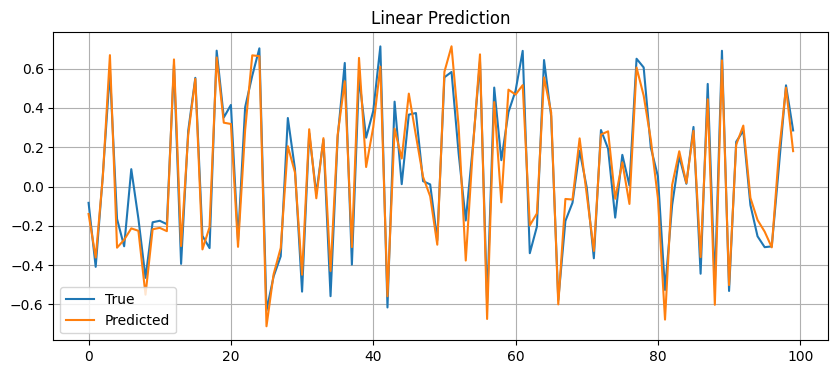

In [45]:
y_pred = model_linear.predict(X_valid)
plt.figure(figsize=(10, 4))
plt.plot(y_valid[:100], label="True")
plt.plot(y_pred[:100], label="Predicted")
plt.title("Linear Prediction")
plt.legend()
plt.grid(True)
plt.show()

###Simple RNN

In [46]:
model_simple_rnn = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])
model_simple_rnn.compile(loss="mse", optimizer="adam")
model_simple_rnn.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),callbacks=callbacks, verbose=1)
simple_rnn_mse = model_simple_rnn.evaluate(X_valid, y_valid, verbose=1)
print(f"MSE Simple RNN: {simple_rnn_mse:.4f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0447 - val_loss: 0.0292
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0263 - val_loss: 0.0188
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0174 - val_loss: 0.0137
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0134 - val_loss: 0.0120
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0122 - val_loss: 0.0116
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0118 - val_loss: 0.0115
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0118 - val_loss: 0.0115
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0114 - val_loss: 0.0115
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0117 - val_loss: 0.0115
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0118 - val_loss: 0.0115
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116
MSE Simple RNN: 0.0115


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


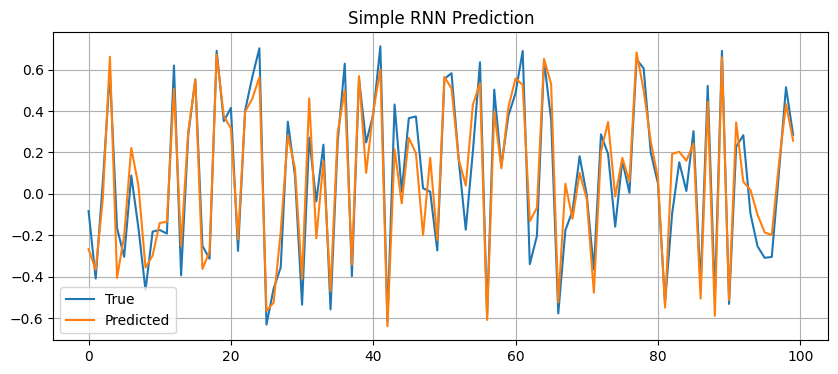

In [47]:
y_pred = model_simple_rnn.predict(X_valid)
plt.figure(figsize=(10, 4))
plt.plot(y_valid[:100], label="True")
plt.plot(y_pred[:100], label="Predicted")
plt.title("Simple RNN Prediction")
plt.legend()
plt.grid(True)
plt.show()

###Deep RNN

In [48]:
model_deep_rnn = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])
model_deep_rnn.compile(loss="mse", optimizer="adam")
model_deep_rnn.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),callbacks=callbacks, verbose=1)
deep_rnn_mse = model_deep_rnn.evaluate(X_valid, y_valid, verbose=1)
print(f"MSE Deep RNN: {deep_rnn_mse:.4f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 0.0290 - val_loss: 0.0041
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0039 - val_loss: 0.0030
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 0.0029 - val_loss: 0.0028
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028
MSE Deep RNN: 0.0027


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


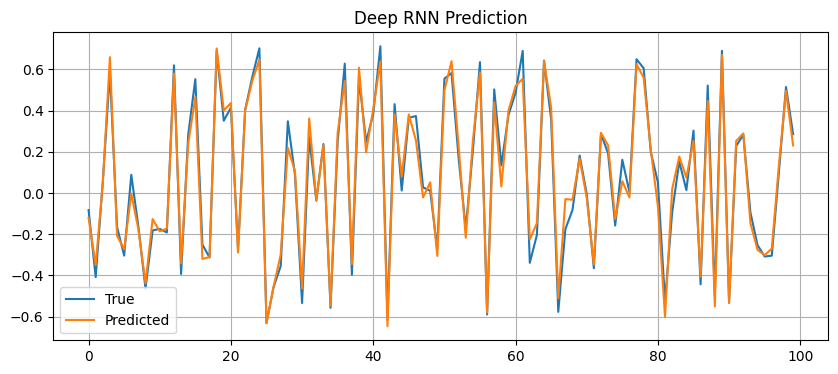

In [49]:
y_pred = model_deep_rnn.predict(X_valid)
plt.figure(figsize=(10, 4))
plt.plot(y_valid[:100], label="True")
plt.plot(y_pred[:100], label="Predicted")
plt.title("Deep RNN Prediction")
plt.legend()
plt.grid(True)
plt.show()

###LSTM

In [50]:
model_lstm = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20),
    keras.layers.Dense(1)
])
model_lstm.compile(loss="mse", optimizer="adam")
model_lstm.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),callbacks=callbacks, verbose=1)
lstm_mse = model_lstm.evaluate(X_valid, y_valid, verbose=1)
print(f"MSE model LSTM: {lstm_mse:.4f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - loss: 0.0750 - val_loss: 0.0270
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0213 - val_loss: 0.0081
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0067 - val_loss: 0.0035
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0037 - val_loss: 0.0031
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0028 - val_loss: 0.0027
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0027
MSE model LSTM: 0.0026


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


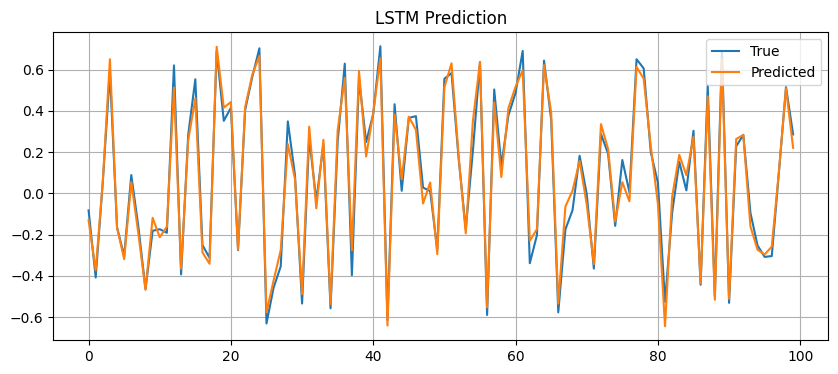

In [51]:
y_pred = model_lstm.predict(X_valid)
plt.figure(figsize=(10, 4))
plt.plot(y_valid[:100], label="True")
plt.plot(y_pred[:100], label="Predicted")
plt.title("LSTM Prediction")
plt.legend()
plt.grid(True)
plt.show()

###GRU

In [52]:
model_gru = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20),
    keras.layers.Dense(1)
])
model_gru.compile(loss="mse", optimizer="adam")
model_gru.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),callbacks=callbacks, verbose=1)
gru_mse = model_gru.evaluate(X_valid, y_valid, verbose=1)
print(f"MSE model GRU: {gru_mse:.4f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 57ms/step - loss: 0.0693 - val_loss: 0.0113
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0082 - val_loss: 0.0044
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - loss: 0.0046 - val_loss: 0.0042
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - loss: 0.0044 - val_loss: 0.0047
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - loss: 0.0037 - val_loss: 0.0035
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0035
MSE model GRU: 0.0035


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


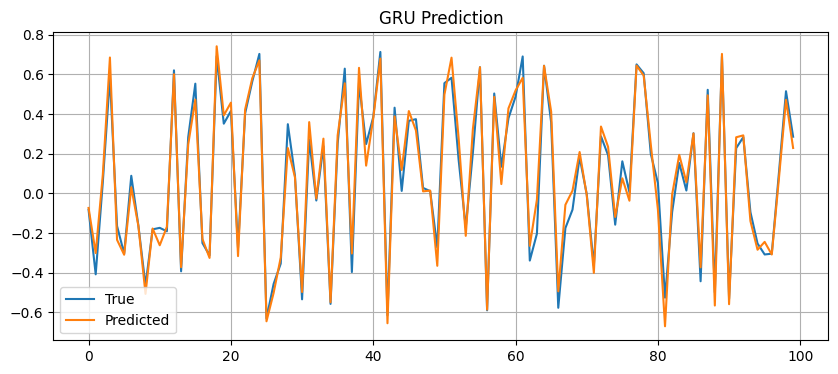

In [53]:
y_pred = model_gru.predict(X_valid)
plt.figure(figsize=(10, 4))
plt.plot(y_valid[:100], label="True")
plt.plot(y_pred[:100], label="Predicted")
plt.title("GRU Prediction")
plt.legend()
plt.grid(True)
plt.show()

###WaveNet

In [54]:
model_wavenet = keras.models.Sequential()
model_wavenet.add(keras.layers.InputLayer(input_shape=[None, 1]))
for rate in (1, 2, 4, 8) * 2:
    model_wavenet.add(keras.layers.Conv1D(filters=20, kernel_size=2, padding="causal",
                                           activation="relu", dilation_rate=rate))
# Layer output
model_wavenet.add(keras.layers.Conv1D(filters=1, kernel_size=1))

model_wavenet.compile(loss="mse", optimizer="adam")
model_wavenet.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),callbacks=callbacks, verbose=1)
wavenet_mse = model_wavenet.evaluate(X_valid, y_valid, verbose=1)
print(f"MSE model WaveNet: {wavenet_mse:.4f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.1451 - val_loss: 0.1396
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1458 - val_loss: 0.1393
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1422 - val_loss: 0.1373
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1404 - val_loss: 0.1327
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.1330 - val_loss: 0.1242
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1292 - val_loss: 0.1222
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1273 - val_loss: 0.1189
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1246 - val_loss: 0.1162
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1202 - val_loss: 0.1156
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1199 - val_loss: 0.1148
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1176
MSE model WaveNet: 0.1148


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


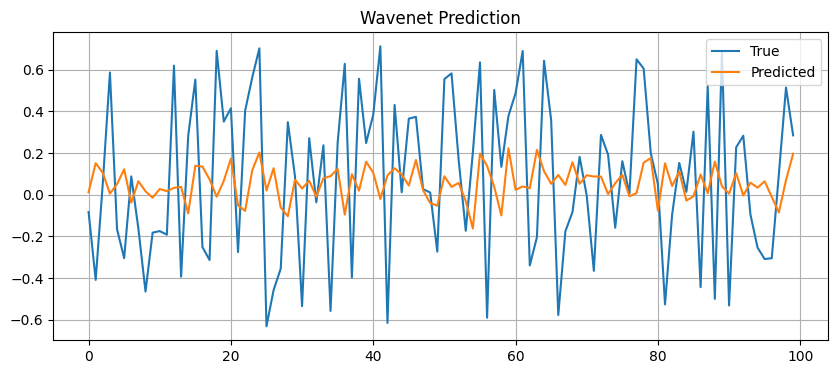

In [56]:
y_pred = model_wavenet.predict(X_valid)
plt.figure(figsize=(10, 4))
plt.plot(y_valid[:100], label="True")
plt.plot(y_pred[:100, -1, 0], label="Predicted") # Select the last prediction and remove the last dimension
plt.title("Wavenet Prediction")
plt.legend()
plt.grid(True)
plt.show()